 Auth: Mawaba P. DAO

 03/08/2021

 Florida Institute of Technology
 
 Numerical Optimization: CSE5311 (Dr. Peter)

 HW2

In [168]:
%matplotlib inline
import matplotlib.pyplot as plt
import sympy
import numpy as np
from scipy import optimize

The goal of this assignment is to implement a basic gradient descent algorithm from scratch to optimize the following cost function:
$$\min_x f(x) = (x_1 - 2)^2 + (x_2 - 2)^2$$
where $x = (x_1,x_2)$.  When you visualize the cost function, plot it on the range $x_1\in[-1, 6]$ and $x_2\in[-1, 6]$ .  We are only going to do unconstrained optimization.  The ranges I provided here are just to limit the plotting domain.

In [35]:
# We will use symbolic module to define two variables and the cost function.
x1, x2 = sympy.symbols("x_1, x_2")
f_sym = (x1-2)**2 + (x2-2)**2
f_sym

(x_1 - 2)**2 + (x_2 - 2)**2

In [36]:
# Use symbolic evaluation to get our gradient
fprime_sym = [f_sym.diff(x_) for x_ in (x1, x2)]

In [37]:
# Display the gradient
sympy.Matrix(fprime_sym)

Matrix([
[2*x_1 - 4],
[2*x_2 - 4]])

In [38]:
# Use symbolic evaluation to get our Hessian
fhess_sym = [[f_sym.diff(x1_, x2_) for x1_ in (x1, x2)] for x2_ in (x1, x2)]

In [39]:
# Display the Hessian
sympy.Matrix(fhess_sym)

Matrix([
[2, 0],
[0, 2]])

In [40]:
# Transforms sympy expressions for the cost, gradient, and hessian to lambda functions which can be used to calculate numerical 
# values very fast.
cost_lmbda = sympy.lambdify((x1, x2), f_sym, 'numpy')
grad_lmbda = sympy.lambdify((x1, x2), fprime_sym, 'numpy')
hess_lmbda = sympy.lambdify((x1, x2), fhess_sym, 'numpy')

In [41]:
# Write a wrapper function that lets you pass a single array as the argument
# instead of one argument for each variable.

def wrapper(f):
    return lambda X: np.array(f(X[0], X[1]))


In [42]:
# Create the vectorized version of functions for the cost and the gradient.
cost = wrapper(cost_lmbda)
grad = wrapper(grad_lmbda)

In [29]:
grad([5,5])

array([6, 6])

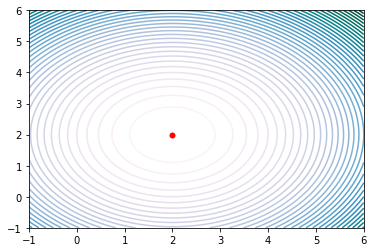

In [56]:
# Visualize the contour plot of the cost function in the range indicated at top of the HW.  Put about a 100 points 
# in each direciton.  You should be able to visually see where the minimum.
x = y = np.linspace(-1, 6, 100)
X, Y = np.meshgrid(x, y)
plt.contour(X, Y, cost_lmbda(X, Y), 50, cmap='PuBuGn')
plt.plot(2,2,'ro', markersize=5)

In [143]:
# Intialize a starting location for your gradient descent search to x = [5,5].
x0 = np.array([5,5])

Write code that starts at the desired starting point and performs gradient descent update to reach the optimal $x$ value for the objective function $f(x)$.  For each iteration of your gradient descent update, plot the new location on the contour plot of your objective function.  When your program finishes executing you should have a trail of dots starting from your initial point to your final soluiton.  Extra points will be given to those that implement both gradient descent and Newton's method udpates.  Some hints:
* Follow the pseudo code shell we outline in class
* To make the plot appear as as separate window (instead of embedded in your notebook) simply call %matplotlib  (notice no 'inline') in the cell
* Make sure you have good stopping conditions for your loop.  I recommend having at least an iteration counter to stop if a maximum number of iterations are reached, and also, something that checks the size of norm of the gradient.
* You should have probably less than 20 lines of code.  If you have a ton more, may want to think about the structure of your code, or if you really understand the gradient descent method.

Gradient Descent Algorithm
$$
x_{t+1} = x_t - \eta*\nabla(f(x))
$$
Where$\\ $ $x_{t+1}$ : Position at current step 

$x_{t}$ : Position at previous step

$\eta$ : Step length factor

Converged after 202 steps


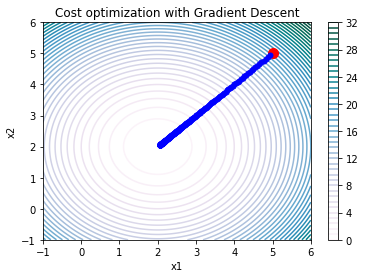

In [171]:
gd_opt = gradDesc(x0, grad, max_iter = 1000)

Newton Method Algorithm
$$
x_{t+1} = x_t - \eta*H^{-1}g
$$
Where$\\ $ $x_{t+1}$ : Position at current step 

$x_{t}$ : Position at previous step

$\eta$ : Step length factor

$H$ : $\nabla^2(f(x))$

$g$: $\nabla(f(x))$

Converged after 406 steps
(2,)


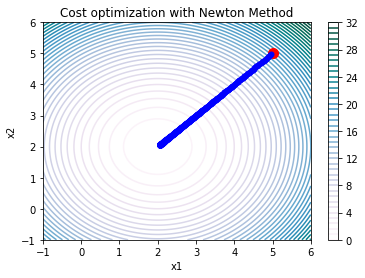

In [172]:
x0 = np.array([5,5])
nm_opt = newtonMeth(x0, grad, hess)

In [173]:
# Print out your final optimal value and where it occured.
print(f'Optimal value from Gradient Descent: {gd_opt}')
print(f'Optimal value fro Newton Method: {nm_opt}')

Optimal value from Gradient Descent: [2.0496609 2.0496609]
Optimal value fro Newton Method: [2.05019327 2.05019327]


In [170]:
def is_psd(x):
    return np.all(np.linalg.eigvals(x) >= 0)

def norm(x):
     return np.linalg.norm(x)

def gradDesc(x0, grad, step=0.01, max_iter=1000):
    x = y = np.linspace(-1, 6, 100)
    X, Y = np.meshgrid(x, y)
    plt.contour(X, Y, cost_lmbda(X, Y), 50, cmap='PuBuGn')
    plt.plot(x0[0],x0[1],'ro', markersize=10)
    x = x0
    for i in range(max_iter):
        x = x - step*grad(x)
        norm = np.linalg.norm(x)
        if norm < 2.9:
            print(f'Converged after {i} steps')
            break
        plt.plot(x[0],x[1],'bo', markersize=5)
    plt.title("Cost optimization with Gradient Descent")
    plt.colorbar()
    plt.xlabel('x1')
    plt.ylabel('x2')
    plt.show()
    return x

def newtonMeth(x0, grad, hess, step=0.01, max_iter=1000):
    x = y = np.linspace(-1, 6, 100)
    X, Y = np.meshgrid(x, y)
    plt.contour(X, Y, cost_lmbda(X, Y), 50, cmap='PuBuGn')
    plt.plot(x0[0],x0[1],'ro', markersize=10)
    x = x0
    for i in range(max_iter):
        H = hess(x)
        if is_psd(H): #Make sure we are going downhill
            H_inv = np.linalg.inv(H)
            x = x - step*np.dot(H_inv, grad(x))
            norm = np.linalg.norm(x)
            if norm < 2.9:
                print(f'Converged after {i} steps')
                break
            plt.plot(x[0],x[1],'bo', markersize=5)
        else:
            print("Error: Hessian must be positive semi definite")
            break
    print(x.shape)
    plt.title("Cost optimization with Newton Method")
    plt.colorbar()
    plt.xlabel('x1')
    plt.ylabel('x2')
    plt.show()
    return x


